<a href="https://colab.research.google.com/github/Bandinaresh01/Bandinaresh01/blob/main/mnist_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from keras.datasets import mnist

In [3]:
data=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train=x_train/255
x_test=x_test/255

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
import numpy as np

# Count the occurrences of each unique value in y_test
unique_values, counts = np.unique(y_test, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 980
Value: 1, Count: 1135
Value: 2, Count: 1032
Value: 3, Count: 1010
Value: 4, Count: 982
Value: 5, Count: 892
Value: 6, Count: 958
Value: 7, Count: 1028
Value: 8, Count: 974
Value: 9, Count: 1009


In [9]:
x_train[0].shape

(28, 28)

In [10]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
histroy=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8674 - loss: 0.4737 - val_accuracy: 0.9572 - val_loss: 0.1521
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9601 - loss: 0.1359 - val_accuracy: 0.9628 - val_loss: 0.1234
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9739 - loss: 0.0879 - val_accuracy: 0.9647 - val_loss: 0.1127
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9812 - loss: 0.0625 - val_accuracy: 0.9734 - val_loss: 0.0896
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0482 - val_accuracy: 0.9734 - val_loss: 0.0888
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9899 - loss: 0.0356 - val_accuracy: 0.9744 - val_loss: 0.0858
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9925 - loss: 0.0268 - val_accuracy: 0.9755 - val_loss: 0.0856
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9936 - loss: 0.0209

In [16]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
y_pred=np.argmax(y_pred,axis=1)

In [18]:
accuracy_score(y_test,y_pred)

0.9796

In [19]:
import matplotlib.pyplot as plt

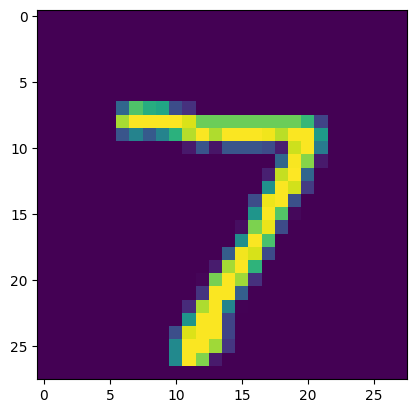

In [20]:
plt.imshow(x_test[0])

In [23]:
predicted=model.predict(x_test[0].reshape(1,28,28))
predicted=np.argmax(predicted,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [24]:
print(predicted)

[7]
